In [1]:
import pandas as pd
import numpy as np

In [2]:
# loading dataset
ds=pd.read_csv('Churn_Modelling.csv')

In [4]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

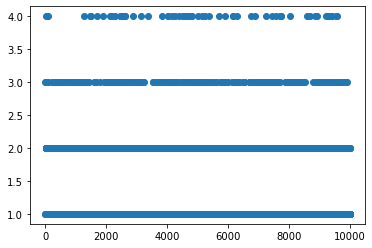

In [10]:
#Univariate Analysis
plt.scatter(ds.index,ds['NumOfProducts'])
plt.show()

Text(0, 0.5, 'Exited')

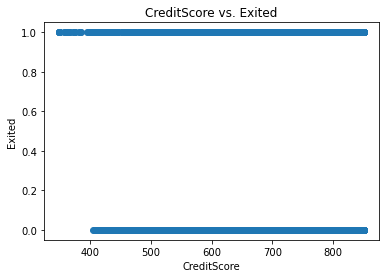

In [12]:
#Bi - Variate Analysis(scatter plot)
plt.scatter(ds.CreditScore, ds.Exited)
plt.title('CreditScore vs. Exited')
plt.xlabel('CreditScore')
plt.ylabel('Exited')

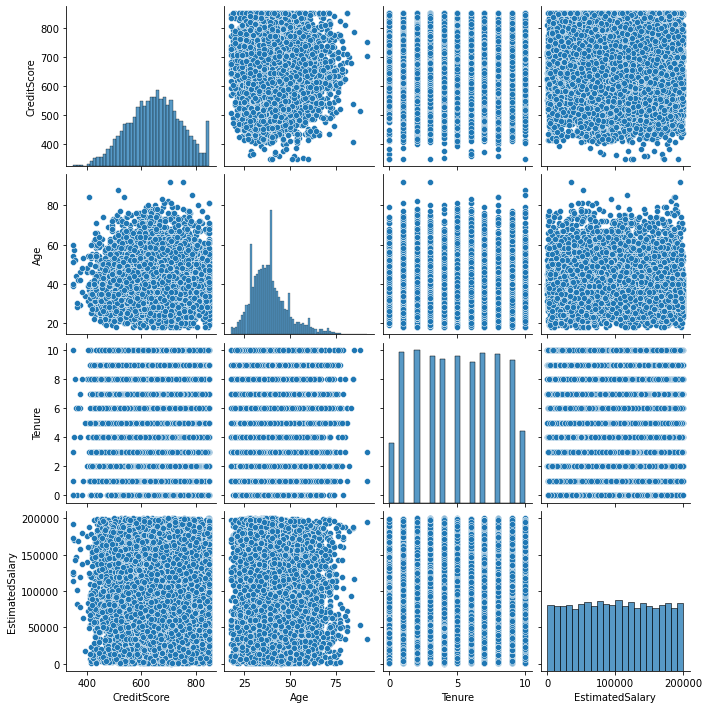

In [14]:
# Multi - Variate Analysis
sns.pairplot(data=ds[['CreditScore','Age','Tenure','EstimatedSalary']])

In [15]:
# descriptive statistics
ds.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
# handling missing values
ds.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

C:\Users\Ulaganathan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

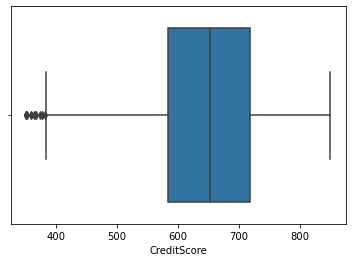

In [17]:
# finding and replacing the outliers
sns.boxplot(ds['CreditScore'])

In [21]:
median=float(ds['CreditScore'].median())
ds['CreditScore']=np.where(ds['CreditScore']<400,median,ds['CreditScore'])

C:\Users\Ulaganathan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

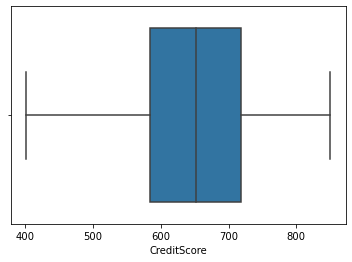

In [22]:
sns.boxplot(ds['CreditScore'])

In [23]:
# checking for categorial column
ds.select_dtypes(include=['object']).columns.tolist()

['Surname', 'Geography', 'Gender']

In [24]:
# performing label encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
ds['Gender']=label_encoder.fit_transform(ds['Gender'])
ds['Gender'].unique()

array([0, 1])

In [25]:
ds.head()
#male-1
#feamle-0

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [29]:
#dropping unwanted column
ds.drop(['RowNumber'],axis=1,inplace=True)

In [30]:
ds.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608.0,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502.0,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699.0,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850.0,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [31]:
#spliting into dependent and independent variables
x=ds.drop(['Exited'],axis=1)
y=ds['Exited']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#splitting the data into test and training 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)